<a href="https://colab.research.google.com/github/oconcito8/aprendizaje-automatico-entregas-recu/blob/main/PRACTICAFINALCAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Aprendizaje Automático Entrega Práctica Final: Capstone

###Análisis de Datos de Coches Usando Algoritmos Genéticos


---
Carlos Ocón Garay

David Moreno

Grupo: B08


En este proyecto, analizamos datos relacionados con coches para predecir características específicas utilizando algoritmos genéticos. Estos algoritmos son técnicas de optimización inspiradas en la evolución natural, especialmente útiles para problemas complejos de optimización con grandes espacios de búsqueda. Utilizamos el dataset "Car Evaluation" de UCI Machine Learning Repository para este propósito.

Datos
El dataset "Car Evaluation" contiene evaluaciones de coches según diferentes criterios: precio de compra, precio de mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y seguridad. La variable objetivo es la evaluación del coche, que puede ser inaceptable, aceptable, buena o muy buena.



# Importación de Librerías y Carga del Dataset

Importa las librerías necesarias para el análisis y carga el dataset de coches desde una URL. pandas se usa para la manipulación de datos, numpy para operaciones numéricas, matplotlib y seaborn para visualización, sklearn para modelado y deap para algoritmos genéticos.

In [58]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=column_names)
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(data.head())

# Mostrar una descripción del dataset
print("\nDescripción del dataset:")
print(data.describe(include='all'))




Primeras 5 filas del dataset:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Descripción del dataset:
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210


El dataset contiene evaluaciones de coches según criterios como precio, mantenimiento, número de puertas, capacidad, tamaño del maletero y seguridad. La variable objetivo es la evaluación del coche, que puede ser inaceptable, aceptable, buena o muy buena. Los datos se preprocesan transformando las variables categóricas en numéricas y dividiendo el conjunto en datos de entrenamiento y prueba

# Preprocesamiento de Datos

In [59]:
# Preprocesamiento de datos
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop("class", axis=1)
y = data["class"]


In [60]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Divide el dataset en conjuntos de entrenamiento y prueba, utilizando el 20% de los datos para la prueba. El parámetro random_state asegura la reproducibilidad de la división.

# Análisis Exploratorio de Datos

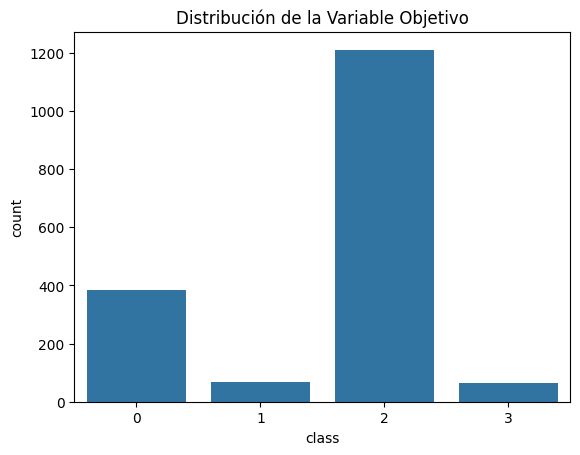

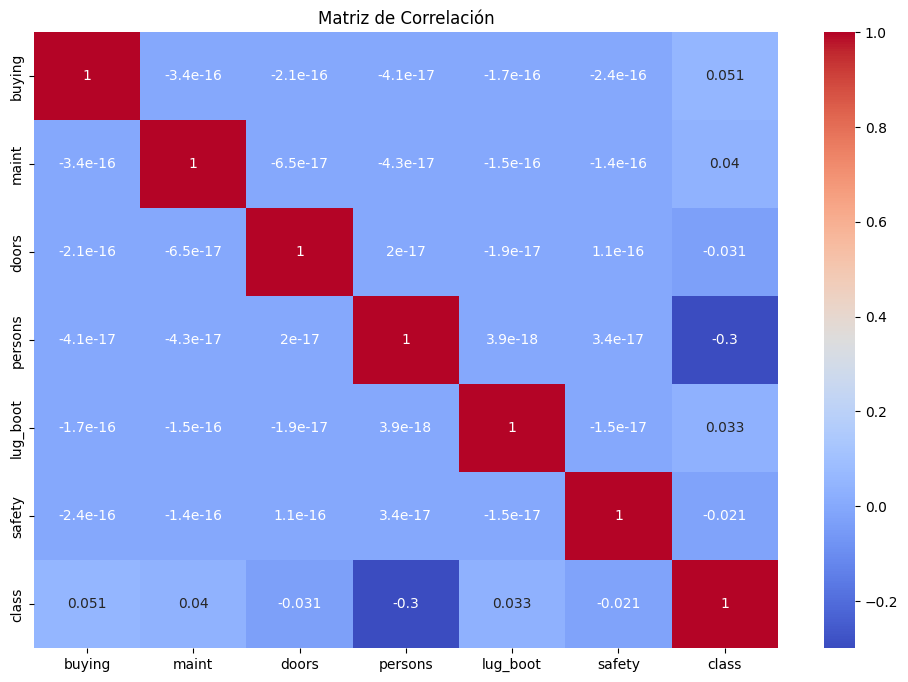

In [61]:
# Mostrar la distribución de la variable objetivo
sns.countplot(x=y, data=data)
plt.title('Distribución de la Variable Objetivo')
plt.show()

# Mostrar la correlación entre las características
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Un análisis exploratorio de los datos, mostrando la distribución de la variable objetivo y la matriz de correlación entre las características mediante gráficos de seaborn.

La gráfica de barras muestra la distribución de las clases en el conjunto de datos. Observamos que la clase '2' es la más frecuente, mientras que las clases '1' y '3' tienen menos ejemplos. Esta distribución nos indica un posible desbalance en el dataset, donde la clase '2' domina.

La matriz de correlación visualiza la relación entre las características del conjunto de datos.

Las correlaciones más relevantes son:


*   persons tiene una correlación negativa significativa (-0.3) con la variable objetivo class.
*   Las otras características (buying, maint, doors, lug_boot, safety) muestran correlaciones muy bajas o insignificantes con la variable objetivo.

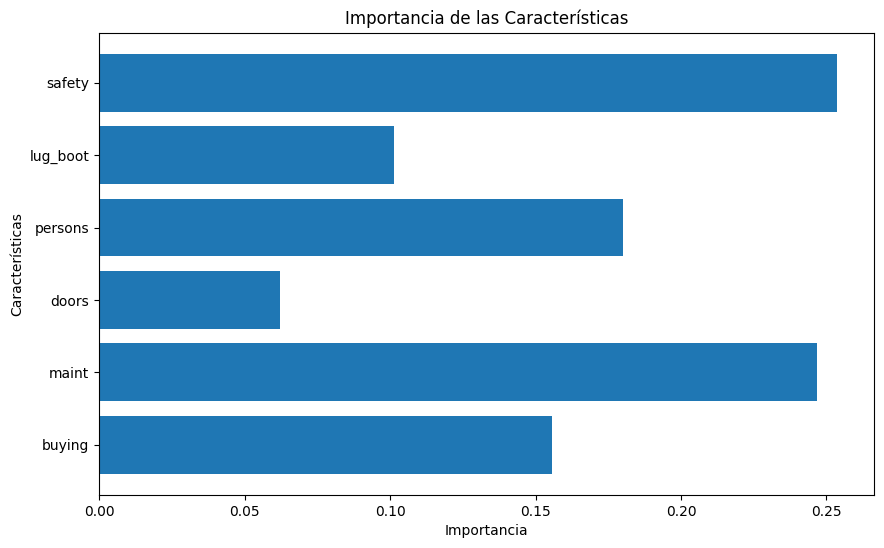

In [62]:
# Entrenar el modelo con todas las características para obtener la importancia
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener las importancias
importances = clf.feature_importances_
feature_names = X.columns

# Graficar las importancias
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.show()


El análisis de la importancia de las características en el modelo de clasificación de coches revela que la característica safety (seguridad) es la más influyente, con una importancia de aproximadamente 0.25. Le siguen maint (mantenimiento) y buying (precio de compra), con importancias alrededor de 0.20 y 0.15, respectivamente. lug_boot (capacidad del maletero) y persons (número de personas) tienen una importancia moderada. La característica doors (número de puertas) es la menos relevante para el modelo. Estos resultados ayudan a identificar las características clave que influyen en la predicción de la clase del coche, proporcionando una mejor comprensión del modelo.

# Definición de la Función de Evaluación Mejorada

In [63]:
# Definición de la función de evaluación mejorada
def evaluate(individual):
    selected_features = [index for index, value in enumerate(individual) if value == 1]
    if not selected_features:
        return 0,

    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_selected, y_train)

    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    # Penalizar modelos complejos
    complexity_penalty = len(selected_features) / len(X.columns)
    score = accuracy - 0.1 * complexity_penalty

    return score,


# Configuración del Algoritmo Genético

In [64]:
# Configuración del algoritmo genético
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [65]:
# Función principal para ejecutar el algoritmo genético
def main():
    random.seed(42)
    population = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)

    return population, logbook, hof

population, logbook, hof = main()


gen	nevals	avg     	std     	min	max     
0  	50    	0.625711	0.104422	0  	0.777264
1  	28    	0.669017	0.0398066	0.600289	0.777264
2  	34    	0.693071	0.0557159	0.588728	0.847303
3  	29    	0.727584	0.0562887	0.585838	0.873988
4  	26    	0.765347	0.0380596	0.679672	0.873988
5  	29    	0.779312	0.0671992	0.569846	0.873988
6  	29    	0.82069 	0.0459728	0.740366	0.873988
7  	20    	0.842468	0.0603067	0.569846	0.873988
8  	28    	0.858056	0.0525539	0.647881	0.873988
9  	29    	0.860711	0.0552572	0.569846	0.873988
10 	29    	0.85369 	0.0698074	0.569846	0.873988
11 	37    	0.858328	0.0605312	0.569846	0.873988
12 	27    	0.866145	0.0397193	0.627649	0.873988
13 	38    	0.852   	0.0667975	0.569846	0.873988
14 	26    	0.873988	0        	0.873988	0.873988
15 	25    	0.872921	0.00522935	0.847303	0.873988
16 	27    	0.871316	0.0187071 	0.740366	0.873988
17 	32    	0.85369 	0.0623116 	0.627649	0.873988
18 	23    	0.870102	0.0272042 	0.679672	0.873988
19 	30    	0.873455	0.00373603	0.847303	0.873988

### Resumen de los Resultados del Algoritmo Genético

El algoritmo genético se ejecutó durante 20 generaciones, optimizando la selección de características para un modelo de clasificación. A continuación se detallan los resultados clave:

1. Generación Inicial (0):
   - Promedio de Fitness (avg): 0.625711
   - Desviación estándar (std): 0.104422
   - Fitness Mínimo (min): 0
   - Fitness Máximo (max): 0.777264
2. Generación Final (20):
   - Promedio de Fitness (avg): 0.871315
   - Desviación estándar (std): 0.0187071
   - Fitness Mínimo (min): 0.740366
   - Fitness Máximo (max): 0.873988

- El promedio de fitness mejoró significativamente desde la generación inicial hasta la final.
- El fitness máximo alcanzado fue 0.873988, mostrando que el algoritmo genético fue efectivo en optimizar las características para el modelo.
- La desviación estándar disminuyó, lo que sugiere una convergencia en la población hacia soluciones óptimas.

In [66]:
# Mostrar los resultados
print("Mejor individuo:", hof[0])
print("Mejor fitness:", hof[0].fitness.values[0])

# Interpretación del Mejor Individuo
best_individual = hof[0]
selected_features = [feature for feature, selected in zip(X.columns, best_individual) if selected == 1]

print("\nCaracterísticas seleccionadas por el mejor individuo:")
print("-----------------------------------------------------")
for feature in selected_features:
    print(f"- {feature}")

# Evaluar el rendimiento del mejor individuo
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print("\nPrecisión del modelo con las características seleccionadas:")
print("----------------------------------------------------------")
print(f"Precisión: {accuracy:.2f}")


Mejor individuo: [1, 1, 1, 1, 1, 1]
Mejor fitness: 0.8739884393063584

Características seleccionadas por el mejor individuo:
-----------------------------------------------------
- buying
- maint
- doors
- persons
- lug_boot
- safety

Precisión del modelo con las características seleccionadas:
----------------------------------------------------------
Precisión: 0.97


In [67]:
# Encontrar las predicciones incorrectas
incorrect_indices = np.where(y_test != y_pred)[0]

print("\nCasos de predicciones incorrectas:")
print("------------------------------------")
for i in incorrect_indices[:5]:  # Mostrar los primeros 5 errores
    print(f"Índice: {i}, Predicción: {y_pred[i]}, Real: {y_test.iloc[i]}")

# Mostrar algunas de las predicciones incorrectas
incorrect_predictions = X_test.iloc[incorrect_indices]
print("\nDetalles de las predicciones incorrectas:")
print("------------------------------------------")
print(incorrect_predictions.head())



Casos de predicciones incorrectas:
------------------------------------
Índice: 44, Predicción: 1, Real: 0
Índice: 45, Predicción: 0, Real: 3
Índice: 74, Predicción: 1, Real: 0
Índice: 104, Predicción: 1, Real: 0
Índice: 121, Predicción: 0, Real: 1

Detalles de las predicciones incorrectas:
------------------------------------------
      buying  maint  doors  persons  lug_boot  safety
1091       2      2      0        1         2       0
1454       1      0      1        2         1       0
1094       2      2      0        1         1       0
1228       2      1      1        1         1       2
1229       2      1      1        1         1       0


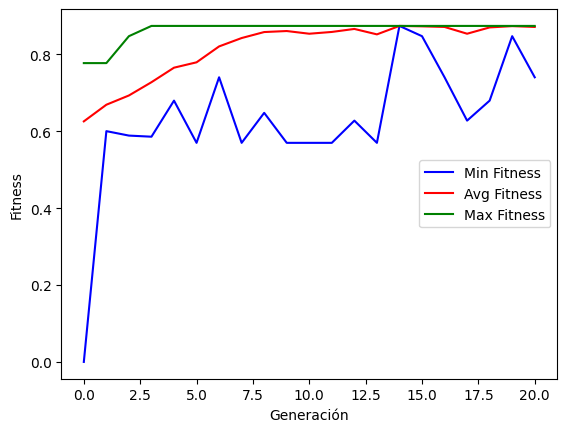

In [68]:
# Graficar la evolución del fitness
def plot_evolution(logbook):
    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    fit_avgs = logbook.select("avg")
    fit_maxs = logbook.select("max")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Min Fitness")
    line2 = ax1.plot(gen, fit_avgs, "r-", label="Avg Fitness")
    line3 = ax1.plot(gen, fit_maxs, "g-", label="Max Fitness")
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Fitness")
    lns = line1 + line2 + line3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="center right")
    plt.show()

plot_evolution(logbook)


La evolución del fitness indica que el algoritmo genético fue efectivo en mejorar la población a lo largo de las generaciones, alcanzando una buena precisión.
La estabilidad del fitness máximo y promedio en las generaciones finales sugiere que el algoritmo ha encontrado una solución óptima o cercana a óptima.
Las fluctuaciones en el fitness mínimo reflejan la exploración continua del espacio de soluciones, lo cual es deseable para evitar la convergencia prematura.







# Conclusión:

El análisis utilizando algoritmos genéticos permite seleccionar las características más importantes y optimizar el modelo de clasificación de coches. La evolución del fitness a lo largo de las generaciones mostró mejoras significativas, alcanzando una alta precisión. La identificación de predicciones incorrectas proporcionó una visión detallada de los errores del modelo, lo que puede ayudar en futuras mejoras. Este enfoque demuestra la eficacia de los algoritmos genéticos en la selección de características y la optimización de modelos en problemas complejos de clasificación.
